In [11]:
from datasets import load_titanic, balance_classes
from tools import model_performance, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.metrics import classification_report, plot_roc_curve
from sklearn.model_selection import cross_val_score

In [12]:
df, df_train, df_test = load_titanic()
df_train.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'target'], dtype='object')

In [13]:
df_train.shape

(178, 8)

In [14]:
original_X = df.drop(['target'], axis=1)
original_y = df['target']
train_X = df_train.drop(['target'], axis=1)
train_y = df_train['target']
test_X = df_test.drop(['target'], axis=1)
test_y = df_test['target']

In [15]:
original_X = pd.get_dummies(original_X)
train_X = pd.get_dummies(train_X)
test_X = pd.get_dummies(test_X)

features = train_X.columns

In [16]:
# kvuli konvergenci
scaler = StandardScaler().fit(train_X)
original_X = scaler.transform(original_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

train_X = pd.DataFrame(train_X, columns=features)
test_X = pd.DataFrame(test_X, columns=features)

In [7]:
model = LogisticRegression()

In [8]:
# stratified (balanced)
scores = cross_val_score(model, original_X, original_y, cv=80)
scores.mean()

0.7950757575757577

In [20]:
model = LogisticRegression()
model.fit(train_X, train_y)

LogisticRegression()

In [22]:
pd.DataFrame(zip(model.coef_[0], features), columns=['coef', 'features'])

,coef,features
0,-1.067587,pclass
1,-0.558494,age
2,-0.496404,sibsp
3,-0.023642,parch
4,0.277860,fare
5,1.088888,sex_female
6,-1.088888,sex_male
7,0.226063,embarked_C
8,-0.297306,embarked_Q
9,0.018044,embarked_S


In [23]:
model_performance(model, train_X, train_y, test_X, test_y)

Train score
0.8539325842696629
Test score
0.7657784011220197


In [24]:
confusion_matrix(model.predict(train_X), train_y, model.predict(test_X), test_y)

Train
TN: 86, TP: 66, FN: 13, FP: 13
Test
TN: 367, TP: 179, FN: 84, FP: 83


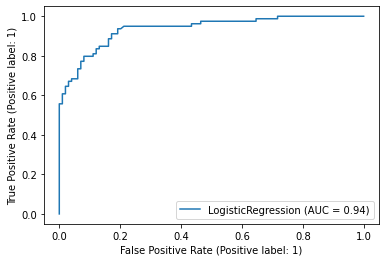

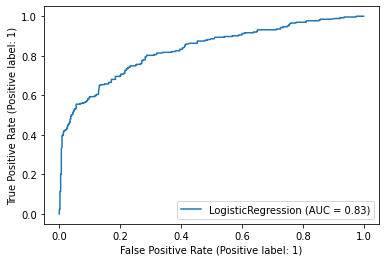

In [25]:
plot_roc_curve(model, train_X, train_y)
plot_roc_curve(model, test_X, test_y)